### 311_Adebiyi_Taiwo_Assignment_1

In [19]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib for visualization
%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/

#seaborn for visualization
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [2]:
# QUESTION 1 - Loading Data
print('Loading data from file ...')  
dataset = pandas.read_csv('BDOShoham.csv')
print('done \n')

print('Removing rows with missing data ...')
dataset = dataset.dropna() 
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [3]:
#Question 1_contd - Previewing Data
print('Sample rows from the dataset (top and bottom five):')  # Spot checks
display(dataset.head(5))
display(dataset.tail(5))
print('\n')

Sample rows from the dataset (top and bottom five):


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.3,0.025,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.0,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.3,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.0,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.3,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5674,5,1.66789,26.1616,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [4]:
#Question 1_cont'd - Presenting Data Summary
#Tabular representations
print('Summary of the dataset - Univariate statistics')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - Univariate statistics


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [5]:
#Graphical summaries will be done for spot checks of X and y (i.e, interested quantities for our Model development)
#As such, we will set the X(features) and y(target) 
#In this case, the features (Vsl, Vsg, and Ang) will be used to predict FlowPattern
print('Reading list of problem variables X and Y...')
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'FlowPattern'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



Sample rows from X (top and bottom):


,Vsl,Vsg,Ang
0,6.3,0.025,0.0
1,4.0,0.040,0.0
2,6.3,0.040,0.0
3,4.0,0.063,0.0
4,6.3,0.063,0.0


,Vsl,Vsg,Ang
5670,2.70096,15.8561,-80.0
5671,1.58784,15.8394,-80.0
5672,1.05338,16.0692,-80.0
5673,1.05397,25.7439,-80.0
5674,1.66789,26.1616,-80.0




Statistical summary of X:


,Vsl,Vsg,Ang
count,5675.000000,5675.000000,5675.000000
mean,0.899747,6.222612,2.727401
std,1.425159,8.699644,46.202822
min,0.001100,0.003720,-90.000000
25%,0.016000,0.162055,-10.000000
50%,0.250000,1.600000,0.500000
75%,1.500000,10.000000,20.000000
max,25.517000,42.956200,90.000000




Summary of X - Univariate graphs

Histograms:


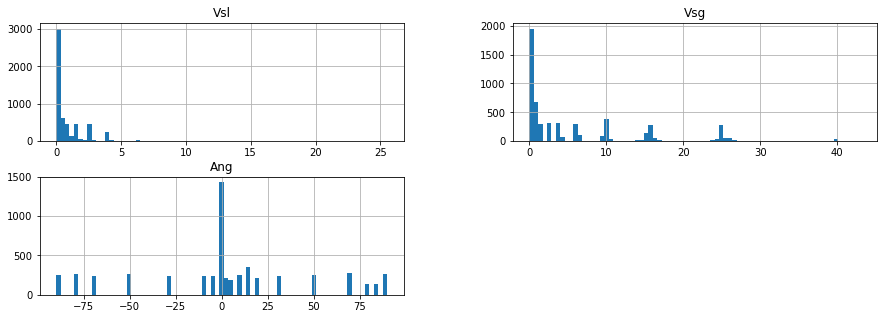

Box plots:


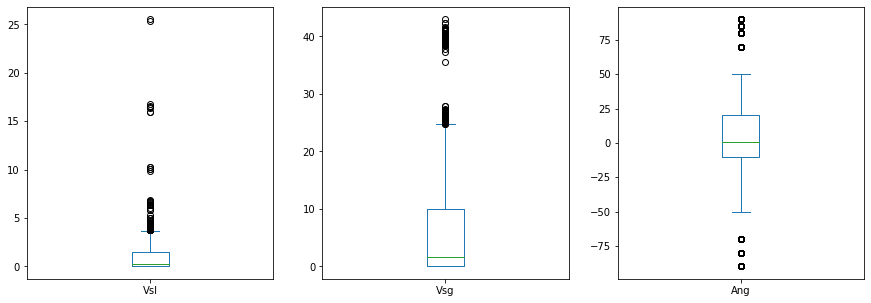

Summary of X - Bivariate (column-pair) graphs:

Correlation matrix:


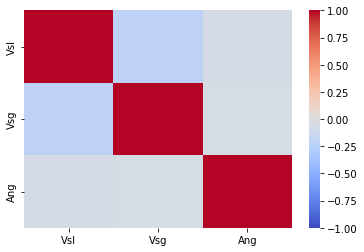

In [6]:
#Question 1_cont'd - Tabular and Graphical summary (spot checks for X)

print('Sample rows from X (top and bottom):')
display(X.head(5))
display(X.tail(5))
print('\n')

print('Statistical summary of X:')
display(X.describe())
print('\n')

print('Summary of X - Univariate graphs\n')

print('Histograms:')
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

print('Box plots:')
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

print('Summary of X - Bivariate (column-pair) graphs:\n')
print('Correlation matrix:')
corr = X.corr()
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
pl.show()

In [7]:
#tabular_representation_for_y
print('Summary of y:')
display(y.value_counts())
print()
print('Sample rows from Y (top and bottom):')
display(y.head(5))
print()
display(y.tail(5))
print('\n')

Summary of y:


5    2905
4    1033
3     878
1     594
2     140
7     125
Name: FlowPattern, dtype: int64


Sample rows from Y (top and bottom):


0    1
1    1
2    1
3    1
4    1
Name: FlowPattern, dtype: int64

5670    5
5671    5
5672    5
5673    5
5674    5
Name: FlowPattern, dtype: int64

Summary of y - Univariate graph

Histogram:


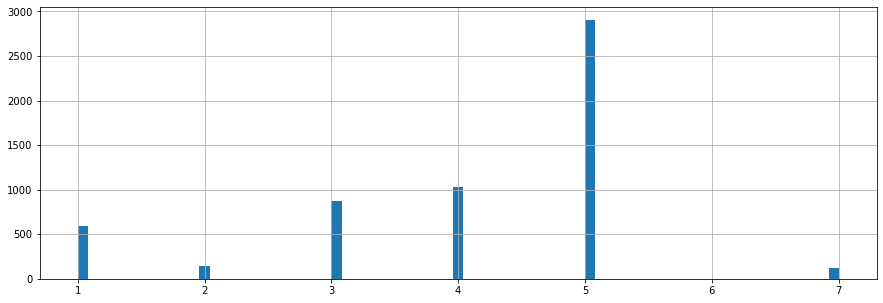

In [8]:
#graphical_representation_for_y
print('Summary of y - Univariate graph\n')

print('Histogram:')
y.hist(figsize=(15, 5), bins=75)  
pl.show()

In [9]:
# Question 2 - Setting up a classification problem

# Split data into training and testing datasets
from sklearn import model_selection

print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 42          # specifying the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

Partitioning data into parts: formative (for development) and summative (for testing) ...
done with setting aside data for testing


In [10]:
#Question 2 - training the model
# Chose the Algorithms
seed = 56 # setting the seed allows for repeatability

print('Reading list of algorithms to train ...')
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight=None, solver='lbfgs', max_iter=250)))
models.append(('Ridge', RidgeClassifier(alpha=10)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))
print('done \n')

Reading list of algorithms to train ...
done 



### Time to use different scorers
##### - accuracy, f1_weighted, and f1_macro are used below

In [11]:
#Question 3 - cont'd
# Now it is time to use cross_validation.
#Note that Kfold is used to for validation. Since K is 5, it means the four parts of the split data will be used for fitting the model 
#and the 5th part will be used for evaluation and validation
scoring = 'accuracy' #used for scoring methods in model development
k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)

print('done \n')

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

algorithm LR accuracy results: mean = 0.665419 (std = 0.021496)
 ++ NOW WORKING ON ALGORITHM Ridge ++
Splitting data into 5 folds
Training model on each split
algorithm Ridge accuracy results: mean = 0.608370 (std = 0.019448)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN accuracy results: mean = 0.837665 (std = 0.008772)
done 



In [12]:
#Question 3 - cont'd
scoring = 'f1_weighted' #used for scoring methods in model development
k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)

print('done \n')

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

algorithm LR f1_weighted results: mean = 0.630586 (std = 0.023378)
 ++ NOW WORKING ON ALGORITHM Ridge ++
Splitting data into 5 folds
Training model on each split
algorithm Ridge f1_weighted results: mean = 0.525009 (std = 0.023357)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN f1_weighted results: mean = 0.839408 (std = 0.009081)
done 



In [13]:
#Question 3 - cont'd
scoring = 'f1_macro' #used for scoring methods in model development
k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)

print('done \n')

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/project/dsi/apps/anaconda3/python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

algorithm LR f1_macro results: mean = 0.476544 (std = 0.023835)
 ++ NOW WORKING ON ALGORITHM Ridge ++
Splitting data into 5 folds
Training model on each split
algorithm Ridge f1_macro results: mean = 0.288442 (std = 0.016201)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN f1_macro results: mean = 0.790684 (std = 0.015274)
done 



## Inferences:

##### - We have now created and train three different models which include "Logistic Regression, Ridge Classifier, and K Neighbors Classifier". 

##### - As such, we will evaluate the performances of the three models using K-fold cross validation across three different scorers including accuracy, f1_weighted, and f1_macro.

##### - From inspection, Logistic regression could not converge as iterations reached its limit. While we can still produce with this model, we expect that its accuracy will be short-changed. This still happened despite setting seed to 56 to ensure repeatibility. 

#### Clearly, kNN exhibits the best performance among the three models as it is redlectted in its accuracy mean and standard deviation. 

##### - A box plot is created below to graphically represent the comparative performance of the models. Note that the box plots show the spread and mean of the models' accuracies. 

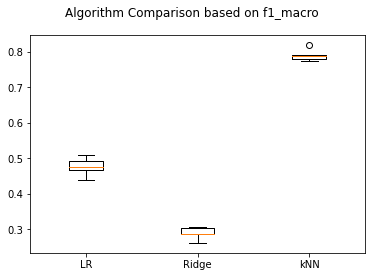

In [14]:
# Compare Algorithms
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

In [16]:
#Question 4
#Since kNN is the best model, it will be selected for tuning by modifying its hyperparameters
#models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2))) - default setting evaluated earlier
kNN = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', p=2) #modified model
print('Working on modified model fitting...')
kNN.fit(X_train,y_train)  
print('Done!') 

Working on modified model fitting...
Done!


In [17]:
#
scoring = 'accuracy' #used for scoring methods in model development
k4folds = 5
print("NOW WORKING ON MODIFIED KNN")
print("Splitting data into %s folds" % k4folds)
kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
print("Training model on each split")
cv_results = model_selection.cross_val_score(kNN, X_train, y_train, cv=kfold, scoring=scoring)
msg = "algorithm %s %s results: mean = %f (std = %f)" % ("kNN results", scoring, cv_results.mean(), cv_results.std())
print(msg)

    
print('done \n')

NOW WORKING ON MODIFIED KNN
Splitting data into 5 folds
Training model on each split
algorithm kNN results accuracy results: mean = 0.855947 (std = 0.008514)
done 



### Inferences on hyperparameters modification

##### - Two hyperparameters were modified for kNN. 
##### - Specifically, the weight option was modified to "distance"; uniform being the default settings
##### - And the n_neighbors was changed from 5 to 3. 

#### As indicated above, the kNN model improved in its performance by about 2% with lesser spread (std) when compared to the accuracy scorer. Thus, the hyperparameter tuning will be adopted.

#### --------------------------------------------------------------
### Time to use the test set on the best model
##### ------------------------------------------------------------------------------

RESULTS for modified kNN
Accuracy 0.8757709251101321


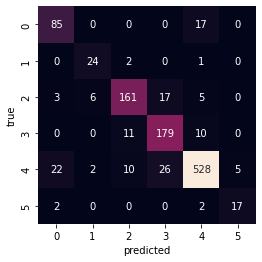


 clasification report:
               precision    recall  f1-score   support

           1       0.76      0.83      0.79       102
           2       0.75      0.89      0.81        27
           3       0.88      0.84      0.86       192
           4       0.81      0.90      0.85       200
           5       0.94      0.89      0.91       593
           7       0.77      0.81      0.79        21

    accuracy                           0.88      1135
   macro avg       0.82      0.86      0.84      1135
weighted avg       0.88      0.88      0.88      1135

Cohen Kappa Score: 0.8143204221430163




In [20]:
y_predicted = kNN.predict(X_test)
print("RESULTS for modified kNN")
print("Accuracy", accuracy_score(y_test, y_predicted))
sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
pl.xlabel("predicted")
pl.ylabel("true")
pl.show()
print('\n clasification report:\n', classification_report(y_test, y_predicted))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
print('\n')  

## Final Inference
### Clearly, the modified model excellently performed well. One could notice that its scores closely match (slightly above) those obtained during the cross validation stage. Thus, the pracitce exams reflected well in the final external exams (summative).